In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("./diabetes.csv")
print(df)
df.shape

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

(768, 9)

In [3]:
df.info() 
# gives information on the dataset, mainly the data type, number of null values and dimensions of the data. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum() 
#checking for the number of missing values in each column
#No null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()
#no duplicates


0

In [6]:
label_name = 'Outcome' # define the label name
label=df[label_name]
features = df.columns[df.columns != label_name] # define the features which is nothing but the rest of the columns excluding the label column.
print(features)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')


In [7]:
#checking for 0 values
zeros=(df==0).sum()
print(zeros)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [8]:
replace_with_NaN = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[replace_with_NaN] = df[replace_with_NaN].replace(0, np.nan)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [9]:
for column in replace_with_NaN:
    median_value = df[column].median() 
    df[column].fillna(median_value, inplace=True)

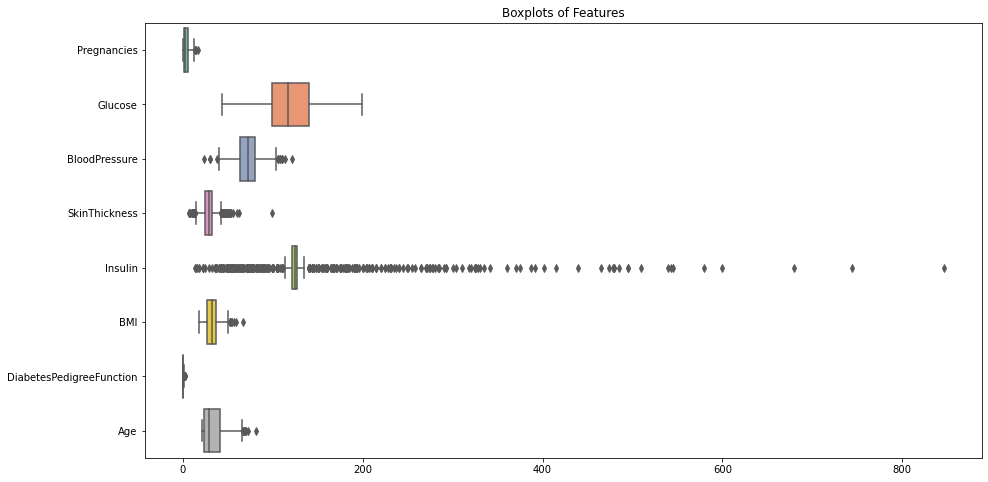

In [10]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[features], orient="h", palette="Set2")
plt.title('Boxplots of Features')
plt.show()

In [11]:
print(df['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [12]:
df_majority = df[df['Outcome'] == 0]
df_minority = df[df['Outcome'] == 1]

df_minority_oversampled = resample(df_minority, 
                                   replace=True, 
                                   n_samples=len(df_majority),  
                                   random_state=50)

df_balanced = pd.concat([df_majority, df_minority_oversampled])

df_balanced = df_balanced.sample(frac=1, random_state=50).reset_index(drop=True)

print(df_balanced['Outcome'].value_counts())

0    500
1    500
Name: Outcome, dtype: int64


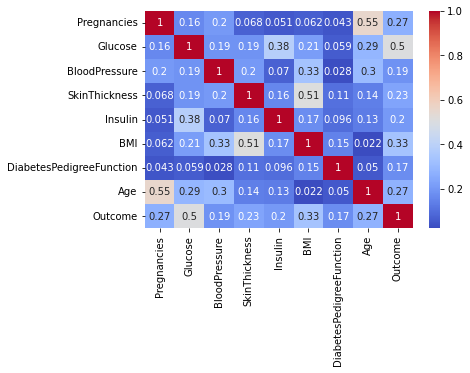

In [13]:
corr_matrix = df_balanced.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [14]:
features = df_balanced.columns[df_balanced.columns != 'Outcome']
label_name = 'Outcome'

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_balanced[features]), columns=features)

df_scaled['Outcome'] = df_balanced['Outcome'].values

print(df_scaled.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.635767 -1.428467      -0.093590      -1.606351 -0.810524 -0.448951   
1    -0.635767 -0.152522       0.246737      -0.313080  0.639994  0.393468   
2     1.626749 -0.494849      -0.263754      -0.313080 -0.237335 -0.826587   
3     0.212676 -0.308125       1.608048      -0.097534 -0.237335  0.132027   
4     1.061120 -0.090281       0.246737      -0.636398  5.319084 -0.652294   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.188981 -0.807848        0  
1                 -0.008279 -0.721687        0  
2                 -1.062384  0.484571        1  
3                 -0.458277  0.312248        0  
4                  0.620486  1.518506        1  


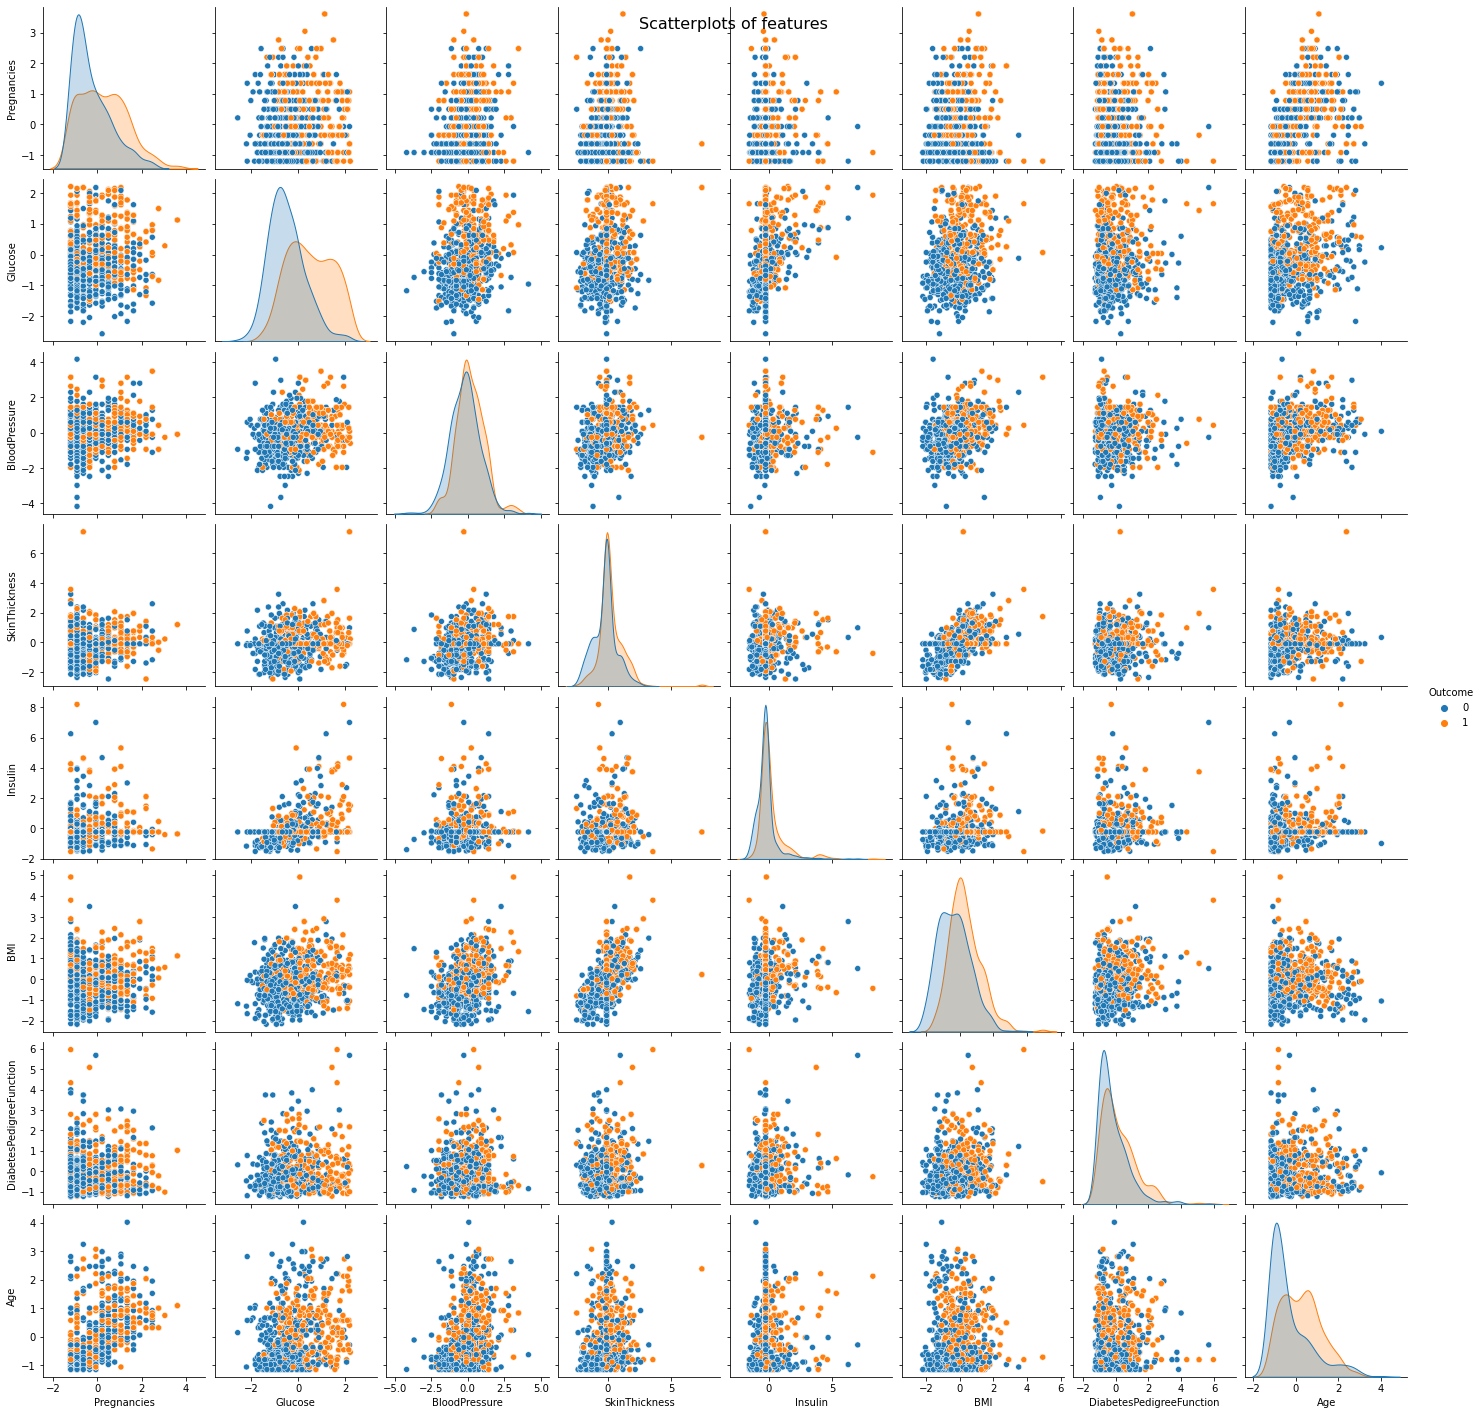

In [15]:
sns.pairplot(df_scaled, hue='Outcome', diag_kind='kde')
plt.suptitle('Scatterplots of features', size=16)
plt.show()


Test Accuracy: 69.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70       102
           1       0.69      0.66      0.68        98

    accuracy                           0.69       200
   macro avg       0.69      0.69      0.69       200
weighted avg       0.69      0.69      0.69       200


Confusion Matrix:
[[73 29]
 [33 65]]


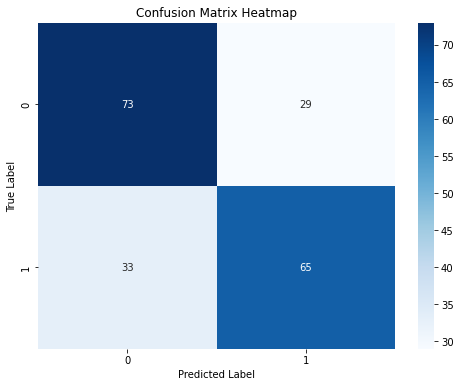

In [27]:
X = df_scaled.drop(columns='Outcome')
y = df_scaled['Outcome']

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1999)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr=learning_rate
        self.n_iters=n_iters
        self.weights=None
        self.bias=None

    def activation_function(self, x):
        return np.where(x>=0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                output=np.dot(x_i, self.weights)+self.bias
                y_predicted=self.activation_function(output)

                update = self.lr*(y[idx]-y_predicted)
                self.weights+=update*x_i
                self.bias+=update

    def predict(self, X):
        output=np.dot(X, self.weights)+self.bias
        y_predicted=self.activation_function(output)
        return y_predicted

perceptron_train=Perceptron(learning_rate=0.01, n_iters=1000)
perceptron_train.fit(X_train.to_numpy(), y_train.to_numpy())

y_test_predictions = perceptron_train.predict(X_test.to_numpy())

test_accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_test_predictions))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_predictions))

cm = confusion_matrix(y_test, y_test_predictions)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Learning Rate: 0.001, Iterations: 500, Accuracy: 0.665
Learning Rate: 0.001, Iterations: 1000, Accuracy: 0.69
Learning Rate: 0.001, Iterations: 2000, Accuracy: 0.765
Learning Rate: 0.001, Iterations: 5000, Accuracy: 0.75
Learning Rate: 0.01, Iterations: 500, Accuracy: 0.665
Learning Rate: 0.01, Iterations: 1000, Accuracy: 0.69
Learning Rate: 0.01, Iterations: 2000, Accuracy: 0.765
Learning Rate: 0.01, Iterations: 5000, Accuracy: 0.75
Learning Rate: 0.1, Iterations: 500, Accuracy: 0.665
Learning Rate: 0.1, Iterations: 1000, Accuracy: 0.69
Learning Rate: 0.1, Iterations: 2000, Accuracy: 0.765
Learning Rate: 0.1, Iterations: 5000, Accuracy: 0.75
Learning Rate: 1, Iterations: 500, Accuracy: 0.665
Learning Rate: 1, Iterations: 1000, Accuracy: 0.69
Learning Rate: 1, Iterations: 2000, Accuracy: 0.765
Learning Rate: 1, Iterations: 5000, Accuracy: 0.75
Best Hyperparameters: Learning Rate = 0.001, Iterations = 2000
Best Accuracy: 76.5
Confusion Matrix for Best Hyperparameters:
 [[76 26]
 [21 77]

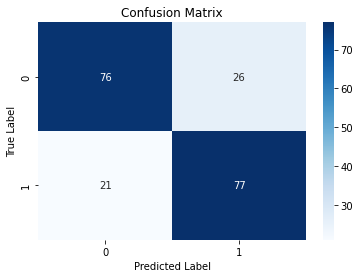

In [28]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_function(output)

                update = self.lr * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_function(output)
        return y_predicted

parameter_grid = {
    'learning_rate': [0.001, 0.01, 0.1, 1],  
    'n_iters': [500, 1000, 2000, 5000]
}

def perceptron_with_params(learning_rate, n_iters):
    model = Perceptron(learning_rate=learning_rate, n_iters=n_iters)
    model.fit(X_train.to_numpy(), y_train.to_numpy())  
    return model

best_accuracy = 0
best_parameters = None
best_predictions = None

for lr in parameter_grid['learning_rate']:
    for iters in parameter_grid['n_iters']:
        model = perceptron_with_params(lr, iters)
        y_test_pred = model.predict(X_test.to_numpy())
        accuracy = accuracy_score(y_test, y_test_pred)
        print(f"Learning Rate: {lr}, Iterations: {iters}, Accuracy: {accuracy}")

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_parameters = (lr, iters)
            best_predictions = y_test_pred 

print(f"Best Hyperparameters: Learning Rate = {best_parameters[0]}, Iterations = {best_parameters[1]}")
print(f"Best Accuracy: {best_accuracy*100}")

cm = confusion_matrix(y_test, best_predictions)
print(f"Confusion Matrix for Best Hyperparameters:\n", cm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.title(f'Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
